In [10]:
import pandas as pd
from fbprophet import Prophet

In [16]:
df = pd.read_csv('/home/henri/Documents/Lighthouse-lab/lighthouse-data-notes/Week_9/w9-d2/examples.csv')

In [17]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [20]:
m = Prophet() # create an instance
m.fit(df) 

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [21]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204125,7.447169,8.952962
3266,2017-01-16,8.529148,7.791190,9.220111
3267,2017-01-17,8.316555,7.621384,9.060935
3268,2017-01-18,8.149153,7.439123,8.877020
3269,2017-01-19,8.161075,7.460977,8.871459


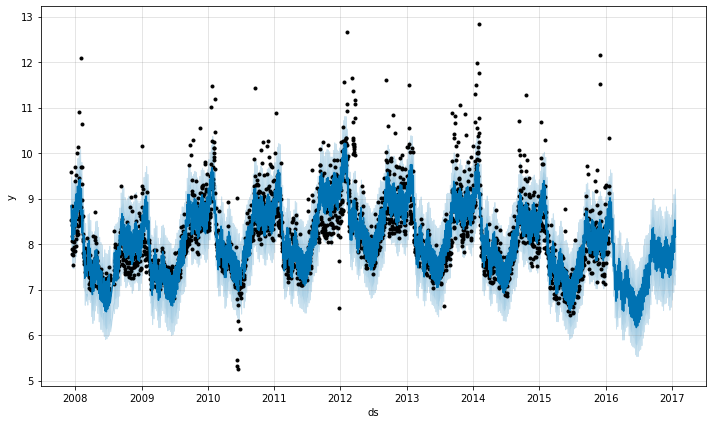

In [23]:
fig1 = m.plot(forecast)

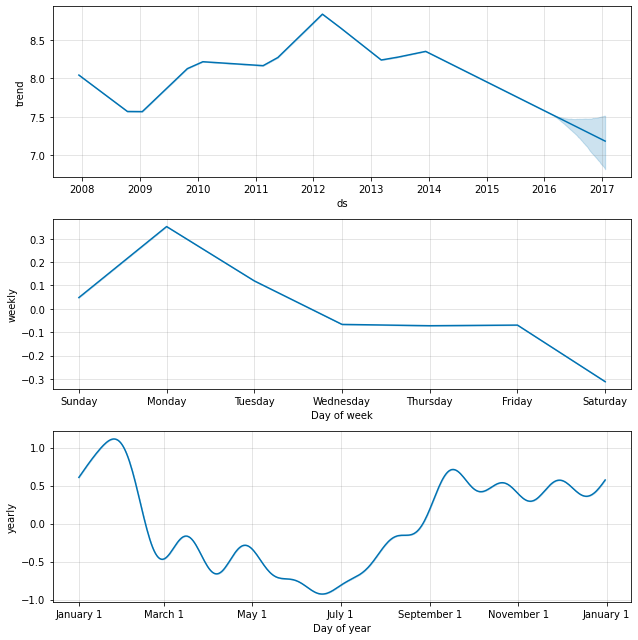

In [24]:
fig2 = m.plot_components(forecast)

In [27]:
from fbprophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
plot_components_plotly(m, forecast)